Team Gordon

Student Name	Student Number
 Alisha Sahota	20497348
 Anthony Ramelo	20499391
 Chris Wu	10182394
 Elizabeth Zhang	20161231
 Emily Zhao	10096273
 Sam Hossain	20466500


Data types of features to scale:
float64    16
int64      15
Name: count, dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

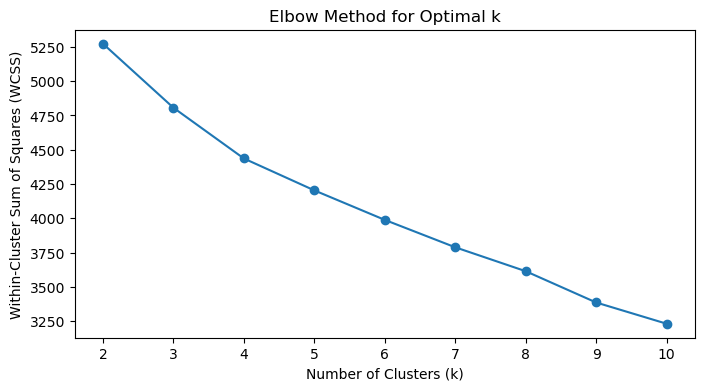

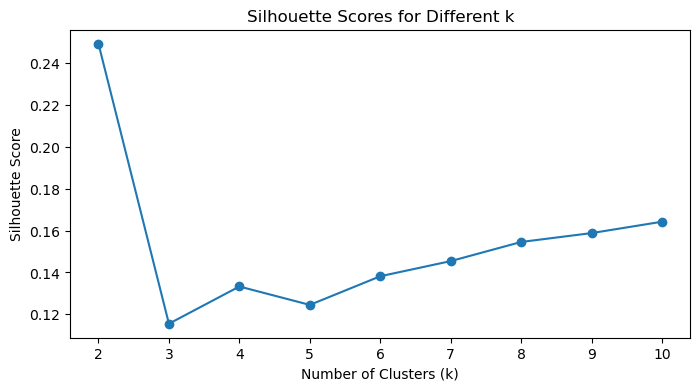

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Profiles:
           Loan Amount  Outstanding Balance  Outstanding Principal  \
Cluster                                                             
0        10853.772762         11495.663333            6991.013143   
1        18861.033222         28198.695667           16743.337778   
2        17229.411765         20097.322353           12939.521765   

         Interest Rate  Loan Term (Months)  Stated Income on application  \
Cluster                                                                    
0             0.282186           55.723810                  72769.209524   
1             0.285789           57.466667                  81547.422222   
2             0.286959           54.294118                  75615.647059   

         Qualified / Verified\nIncome  Aptitude for change Score  \
Cluster                                                            
0                        64983.342857                   3.612217   
1                        86118.111111             

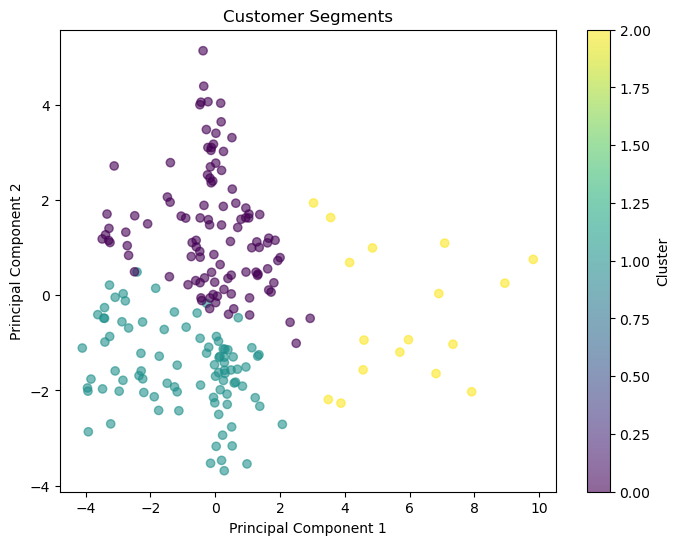

Silhouette Score: 0.1155007152778192


In [83]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# For dimensionality reduction
from sklearn.decomposition import PCA

# For clustering
from sklearn.cluster import KMeans

# For evaluation
from sklearn.metrics import silhouette_score

# ==========================
# Load the Data
# ==========================

# Load the data
dfcrosssection = pd.read_excel('Data 3 - October, 2024.xlsx', sheet_name='Parachute - Cross Section')

# Optional: Convert 'ID' column to string if it's not numeric
dfcrosssection['ID'] = dfcrosssection['ID'].astype(str)

# ==========================
# Data Preprocessing
# ==========================

# 1. Handle missing values

# Drop columns with more than 50% missing values
threshold = len(dfcrosssection) * 0.5
dfcrosssection = dfcrosssection.dropna(thresh=threshold, axis=1)

# For numerical columns, fill missing values with mean
numeric_cols = dfcrosssection.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='mean')
dfcrosssection[numeric_cols] = imputer_num.fit_transform(dfcrosssection[numeric_cols])

# For categorical columns, fill missing values with the most frequent value
categorical_cols = dfcrosssection.select_dtypes(include=['object']).columns

# Exclude 'ID' from categorical columns
categorical_cols = categorical_cols.drop('ID', errors='ignore')

imputer_cat = SimpleImputer(strategy='most_frequent')
dfcrosssection[categorical_cols] = imputer_cat.fit_transform(dfcrosssection[categorical_cols])

# 2. Encode categorical variables

# Use one-hot encoding for categorical variables (excluding 'ID')
df_encoded = pd.get_dummies(dfcrosssection, columns=categorical_cols, drop_first=True)

# 3. Feature Scaling

# Identify datetime columns in df_encoded
datetime_cols = df_encoded.select_dtypes(include=['datetime64[ns]', 'datetime64']).columns

# Identify boolean columns in df_encoded
bool_cols = df_encoded.select_dtypes(include=['bool']).columns

# Convert boolean columns to integers
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# Identify any remaining object columns (excluding 'ID')
object_cols = df_encoded.select_dtypes(include=['object']).columns.drop('ID', errors='ignore')

# Exclude 'ID', datetime columns, and non-numeric object columns from features to scale
features_to_exclude = ['ID'] + list(datetime_cols) + list(object_cols)
features_to_scale = df_encoded.columns.drop(features_to_exclude)

# Verify data types before scaling
print("Data types of features to scale:")
print(df_encoded[features_to_scale].dtypes.value_counts())

# Ensure there are no missing values
if df_encoded[features_to_scale].isnull().values.any():
    df_encoded[features_to_scale] = df_encoded[features_to_scale].fillna(0)

# Scale the features
scaler = StandardScaler()
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

# ==========================
# Dimensionality Reduction using PCA
# ==========================

# Determine the number of components that explain 90% of the variance
pca = PCA(n_components=0.9, random_state=42)
principal_components = pca.fit_transform(df_encoded[features_to_scale])

# Create a DataFrame with principal components
df_pca = pd.DataFrame(data=principal_components)

# ==========================
# Determining the Optimal Number of Clusters
# ==========================

wcss = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_pca, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(K, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(K)
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(K)
plt.show()

# Choose the optimal number of clusters based on the plots
optimal_k = 3  # Adjust this number based on the Elbow and Silhouette plots

# ==========================
# Clustering
# ==========================

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_pca)

# Add the cluster labels to the original DataFrame
dfcrosssection['Cluster'] = df_encoded['Cluster']

# ==========================
# Analysis and Visualization
# ==========================

# Identify numeric columns (excluding 'Cluster' if it's in numeric_cols)
numeric_cols = dfcrosssection.select_dtypes(include=[np.number]).columns.tolist()
if 'Cluster' in numeric_cols:
    numeric_cols.remove('Cluster')

# Analyze Cluster Profiles using only numeric columns
cluster_profiles_numeric = dfcrosssection.groupby('Cluster')[numeric_cols].mean()

# Identify categorical columns (excluding 'ID' and 'Cluster')
categorical_cols = dfcrosssection.select_dtypes(include=['object']).columns.drop(['ID'], errors='ignore')
if 'Cluster' in categorical_cols:
    categorical_cols = categorical_cols.drop('Cluster', errors='ignore')

# Compute mode for categorical columns
def mode_function(x):
    return x.mode().iloc[0] if not x.mode().empty else np.nan

cluster_profiles_categorical = dfcrosssection.groupby('Cluster')[categorical_cols].agg(mode_function)

# Combine numeric and categorical summaries
cluster_profiles = pd.concat([cluster_profiles_numeric, cluster_profiles_categorical], axis=1)

print("Cluster Profiles:\n", cluster_profiles)

# Visualize the clusters using the first two principal components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df_pca.iloc[:, 0],
    df_pca.iloc[:, 1],
    c=df_encoded['Cluster'],
    cmap='viridis',
    alpha=0.6,
)
plt.title('Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

# ==========================
# Evaluation
# ==========================

# Compute the silhouette score
silhouette_avg = silhouette_score(df_pca, df_encoded['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# ==========================
# Save the Segmented Data
# ==========================

# Save the DataFrame with cluster assignments to a CSV file
dfcrosssection.to_csv('segmented_customers.csv', index=False)